# Final Project

Ross Fosher **"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."**

(Project based on and recreated in Python from R by Yuemin Zhang http://rstudio-pubs-static.s3.amazonaws.com/342210_7c8d57cfdd784cf58dc077d3eb7a2ca3.html)

**Sources include the link above and the online discussion forum**

# Import Packages and Data

In [82]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

pd.options.display.max_rows = 15

from sklearn.externals.six import StringIO
import pydotplus

In [83]:
#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols
import plotly.graph_objects as go
import plotly.express as px

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

import statsmodels.api as sm
from statsmodels.formula.api import ols
import plotly.graph_objects as go
import plotly.express as px

# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# grid search
from sklearn.model_selection import GridSearchCV

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
#from graphviz import Source
from IPython.display import display
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc


#pip install scikit-plot (optional)
import scikitplot as skplt

from pandas.plotting import scatter_matrix

import pingouin as pg

import warnings
warnings.filterwarnings("ignore")

from sklearn.externals.six import StringIO
import pydotplus

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

In [84]:
df = pd.read_csv('movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# 1 Background on the Project

## 1.1 Summary of the Project

Movies with big actors and directors that are known today, are often seen as profitable and a generally successful movie due to these names. However, this doesn't always correlate to a high IMDB score. 

The main question trying to be tackled through this project is what does give a movie a high IMDB score.

## 1.2 Goals of the Project

1. To determine the factors and variables that predict a movie to have a high IMDB score.
2. To help film companies build successful movies without the big name actors and directors.
3. To provide simple and understandable explanations for the data manipulating, visualizations, and statistical testing done on the predictors of IMDB score.

## 1.3 Type of Data to Collect

Luckily we have it handy, however I would collect the movies that have a top IMDB score. This could be the top 5000 or even those with an IMDB score greater than 7.5 or 8.0.

## 1.4 Variables highly correlated to IMDB Score

In [85]:
df.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.258486,0.180674,0.271646,0.190016,0.480601,0.624943,0.263203,-0.033897,0.609387,0.119994,0.275707,0.282306,0.305303,-0.049786,0.683176
duration,0.258486,1.000000,0.173296,0.123558,0.088449,0.250298,0.314765,0.123074,0.013469,0.328403,0.074276,-0.135038,0.131673,0.261662,-0.090071,0.196605
director_facebook_likes,0.180674,0.173296,1.000000,0.120199,0.090723,0.144945,0.297057,0.119549,-0.041268,0.221890,0.021090,-0.063820,0.119601,0.170802,0.001642,0.162048
actor_3_facebook_likes,0.271646,0.123558,0.120199,1.000000,0.249927,0.308026,0.287239,0.473920,0.099368,0.230189,0.047451,0.096137,0.559662,0.052633,-0.003366,0.278844
actor_1_facebook_likes,0.190016,0.088449,0.090723,0.249927,1.000000,0.154468,0.192804,0.951661,0.072257,0.145461,0.022639,0.086873,0.390487,0.076099,-0.020049,0.135348
gross,0.480601,0.250298,0.144945,0.308026,0.154468,1.000000,0.637271,0.247400,-0.027755,0.559958,0.102179,0.030886,0.262768,0.198021,0.069346,0.378082
num_voted_users,0.624943,0.314765,0.297057,0.287239,0.192804,0.637271,1.000000,0.265911,-0.026998,0.798406,0.079621,0.007397,0.270790,0.410965,-0.014761,0.537924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
num_user_for_reviews,0.609387,0.328403,0.221890,0.230189,0.145461,0.559958,0.798406,0.206923,-0.069018,1.000000,0.084292,-0.003147,0.219496,0.292475,-0.024719,0.400594
budget,0.119994,0.074276,0.021090,0.047451,0.022639,0.102179,0.079621,0.036557,-0.019559,0.084292,1.000000,0.045726,0.044236,0.030688,0.006598,0.062039


Some correlations to notice from a brief glance involving just quantitative variables and IMDB Score are:

1. Number of Critics
2. Duration
3. Number of users voted (highest)
4. Number of Users for Reviews
5. Director's page Facebook Likes (lowest)
6. Gross
7. Title Year
8. Movie page Facebook Likes

# 2 Data Understanding

## 2.1 Figuring out what we're working with

In [86]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


There's a high amount of variation between the median and the maximum points and minimum points for each numerical column. 

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

We have a total of 28 columns in the data set:

1. 16 of them are numerical columns
2. 12 of them are strings or categorical columns

In [88]:
df.isnull().sum()

color                       19
director_name              104
num_critic_for_reviews      50
duration                    15
director_facebook_likes    104
actor_3_facebook_likes      23
actor_2_name                13
                          ... 
content_rating             303
budget                     492
title_year                 108
actor_2_facebook_likes      13
imdb_score                   0
aspect_ratio               329
movie_facebook_likes         0
Length: 28, dtype: int64

In [89]:
df.groupby('movie_title').size().sort_values(ascending = False)

movie_title
Halloween                             3
King Kong                             3
The Fast and the Furious              3
Pan                                   3
Home                                  3
Ben-Hur                               3
Victor Frankenstein                   3
                                     ..
Soul Survivors                        1
Sound of My Voice                     1
Source Code                           1
South Park: Bigger Longer & Uncut     1
Southland Tales                       1
Southpaw                              1
#Horror                               1
Length: 4917, dtype: int64

From this data, we have duplicates of several movies we need to remove.

In [90]:
df.groupby('content_rating').size().sort_values(ascending = False)

content_rating
R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
             ... 
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y            1
TV-Y7           1
Length: 18, dtype: int64

Data Issues that can be seen:
1. There are duplicate movies that have multiple rows within the dataset.
2. There are a ton of null values within the dataset. Only 7 columns do not have any null values.
3. The content rating variable has some different ratings that are not applicable to today.

## 2.2 Looking into the columns that could be used to predict IMDB Score

In [91]:
df['director_name'].value_counts()

Steven Spielberg      26
Woody Allen           22
Clint Eastwood        20
Martin Scorsese       20
Ridley Scott          17
Tim Burton            16
Steven Soderbergh     16
                      ..
Chad Hartigan          1
Eddie O'Flaherty       1
Russ Meyer             1
Philip Saville         1
Mike Marvin            1
Christian Volckman     1
Michael Cristofer      1
Name: director_name, Length: 2398, dtype: int64

There appears to be quite a bit of Spielburg films and Woody Allen films within the database.

In [92]:
df['title_year'].value_counts().head(10)

2009.0    260
2014.0    252
2006.0    239
2013.0    237
2010.0    230
2015.0    226
2011.0    225
2008.0    225
2012.0    221
2005.0    221
Name: title_year, dtype: int64

Most of the top 5000 movies seems to have come from the 2000's versus the movies produced earlier.

In [93]:
df['duration'].value_counts().head(10)

90.0     161
100.0    141
101.0    139
98.0     135
97.0     131
93.0     129
94.0     124
99.0     124
95.0     124
96.0     113
Name: duration, dtype: int64

These movies have often been between 90 to 100 minutes.

In [94]:
df['director_facebook_likes'].value_counts().head(10)

0.0     907
3.0      70
6.0      66
7.0      64
2.0      63
4.0      60
11.0     59
10.0     53
8.0      52
5.0      52
Name: director_facebook_likes, dtype: int64

The directors facebook likes for these movies tended to be under 10.

In [95]:
df['num_user_for_reviews'].value_counts().head(10)

1.0     51
3.0     33
2.0     32
26.0    32
10.0    29
6.0     28
50.0    26
8.0     25
32.0    25
11.0    24
Name: num_user_for_reviews, dtype: int64

There is a wide-range when it comes to the number of user reviews for these movies. From one to fifty, some movies seem to maybe be an outlier when it comes to their user ratings, depending on the number of crtics who also rated the movie.

In [96]:
df['num_critic_for_reviews'].value_counts().head(10)

1.0     43
9.0     37
5.0     36
10.0    35
8.0     35
12.0    34
16.0    33
81.0    33
43.0    31
29.0    30
Name: num_critic_for_reviews, dtype: int64

This is another wide-range from 1 critic to 81 critics. It is still kind of confusing how a movie could have a IMDB score in the top 5000 when 40 movies have only one critic reviewing them.

In [97]:
df['num_voted_users'].value_counts().head(10)

57      5
6       4
6025    3
374     3
53      3
3119    3
62      3
162     3
2541    3
8       3
Name: num_voted_users, dtype: int64

The amount of users that voted tends to fluctuate. There seems to be a different number of users who voted for the movie for many different movies. Meaning that there doesn't tend to be a single number of voters for each film.

In [98]:
df['aspect_ratio'].value_counts().head(10)

2.35     2360
1.85     1906
1.78      110
1.37      100
1.33       68
1.66       64
16.00      45
2.20       15
2.39       15
4.00        7
Name: aspect_ratio, dtype: int64

Around 4000 movies have the same aspect ratio, we can figure that the presentation of the film won't have an effect on the score if around 80% of movies have the same ratio.

## 2.3 Summary/ Explanation of the Data

This data has a total of 28 different variables:
- 12 Categorical
- 16 Numerical

Some data issues are involved with **some missing values to some duplicate rows** within the dataset

Overall, the data is presented very nicely. The only aspect that may cause some worry is that some movies have a low amount of reviewers for both users and critics. It won't be solved till we see the data but it's confusing how low amounts of reviewers can land a movie within the top 5000 on IMDB.

# 3 Data Transformation

## 3.1 Remove Duplicates

In [99]:
df = df.drop_duplicates(subset = 'movie_title')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4917 entries, 0 to 5042
Data columns (total 28 columns):
color                        4898 non-null object
director_name                4815 non-null object
num_critic_for_reviews       4868 non-null float64
duration                     4902 non-null float64
director_facebook_likes      4815 non-null float64
actor_3_facebook_likes       4894 non-null float64
actor_2_name                 4904 non-null object
actor_1_facebook_likes       4910 non-null float64
gross                        4054 non-null float64
genres                       4917 non-null object
actor_1_name                 4910 non-null object
movie_title                  4917 non-null object
num_voted_users              4917 non-null int64
cast_total_facebook_likes    4917 non-null int64
actor_3_name                 4894 non-null object
facenumber_in_poster         4904 non-null float64
plot_keywords                4765 non-null object
movie_imdb_link              4917 non-

After removing the duplicates, we have around 4917 observations left out of the original 5043.

In [101]:
df.groupby('movie_title').size().sort_values(ascending = False)

movie_title
Æon Flux           1
Head of State      1
Hatchet            1
Hav Plenty         1
Hayride            1
Haywire            1
He Got Game        1
                  ..
Speed Racer        1
Speedway Junky     1
Speed              1
Spellbound         1
Sphere             1
Sphinx             1
#Horror            1
Length: 4917, dtype: int64

## 3.2 Dealing with Columns that are not needed

In [102]:
df = df.drop('aspect_ratio', axis = 1)
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,0


Dropped the aspect ratio column since **around 84% of movies are presented in the same way.** There most likely **wouldn't be a large enough impact in IMDB score with this column.** In addition, original correlation analysis indicates that there wasn't much correlation between the two.

In [103]:
df['color'].value_counts()

Color               4694
 Black and White     204
Name: color, dtype: int64

In [104]:
df = df.drop('color', axis = 1)
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,0


Since around 95.6% of the films were in color, that is a large enough amount of films that it most likely would not impact the IMDB score.

In [105]:
df['language'].value_counts()

English     4583
French        73
Spanish       40
Hindi         28
Mandarin      24
German        19
Japanese      17
            ... 
Kazakh         1
Czech          1
Bosnian        1
Aramaic        1
Filipino       1
Greek          1
Kannada        1
Name: language, Length: 47, dtype: int64

In [106]:
df = df.drop('language', axis = 1)

Because there are above 90% of movies that use English as the main language, we can safely remove the language column to be a predictor for IMDB score.

## 3.3 Removing Null Values and Replacing Zeros

In [107]:
df.isnull().sum()

director_name              102
num_critic_for_reviews      49
duration                    15
director_facebook_likes    102
actor_3_facebook_likes      23
actor_2_name                13
actor_1_facebook_likes       7
                          ... 
country                      5
content_rating             300
budget                     484
title_year                 106
actor_2_facebook_likes      13
imdb_score                   0
movie_facebook_likes         0
Length: 25, dtype: int64

There are a ton of null values. The best take is to **remove null values the columns that are important to the predictor. These would be the gross and budget.**

I will also **remove those rows with missing content rating** since we can't replace them with reasonable data.

In [108]:
df = df[np.isfinite(df['budget'])] #Keeps rows where budget is a finite number.
df.isnull().sum()

director_name                8
num_critic_for_reviews      31
duration                     5
director_facebook_likes      8
actor_3_facebook_likes      16
actor_2_name                10
actor_1_facebook_likes       6
                          ... 
country                      1
content_rating             205
budget                       0
title_year                   8
actor_2_facebook_likes      10
imdb_score                   0
movie_facebook_likes         0
Length: 25, dtype: int64

In [109]:
df = df[np.isfinite(df['gross'])] 
df.isnull().sum()

director_name               0
num_critic_for_reviews      1
duration                    1
director_facebook_likes     0
actor_3_facebook_likes     10
actor_2_name                5
actor_1_facebook_likes      3
                           ..
country                     0
content_rating             51
budget                      0
title_year                  0
actor_2_facebook_likes      5
imdb_score                  0
movie_facebook_likes        0
Length: 25, dtype: int64

In [110]:
df = df.dropna(subset = ['content_rating'])
df.isnull().sum()

director_name              0
num_critic_for_reviews     1
duration                   0
director_facebook_likes    0
actor_3_facebook_likes     6
actor_2_name               2
actor_1_facebook_likes     1
                          ..
country                    0
content_rating             0
budget                     0
title_year                 0
actor_2_facebook_likes     2
imdb_score                 0
movie_facebook_likes       0
Length: 25, dtype: int64

In [111]:
df = df.fillna({'facenumber_in_poster' : df['facenumber_in_poster'].mean()})

df = df.replace({'num_critic_for_reviews': 0}, {'num_critic_for_reviews': np.nan})
df = df.fillna({'num_critic_for_reviews' : df['num_critic_for_reviews'].mean()})

df = df.replace({'director_facebook_likes': 0}, {'director_facebook_likes': np.nan})
df = df.fillna({'director_facebook_likes' : df['director_facebook_likes'].mean()})

df = df.replace({'actor_3_facebook_likes': 0}, {'actor_3_facebook_likes': np.nan})
df = df.fillna({'actor_3_facebook_likes' : df['actor_3_facebook_likes'].mean()})

df = df.replace({'actor_1_facebook_likes': 0}, {'actor_1_facebook_likes': np.nan})
df = df.fillna({'actor_1_facebook_likes' : df['actor_1_facebook_likes'].mean()})

df = df.replace({'cast_total_facebook_likes': 0}, {'cast_total_facebook_likes': np.nan})
df = df.fillna({'cast_total_facebook_likes' : df['cast_total_facebook_likes'].mean()})

df = df.replace({'actor_2_facebook_likes': 0}, {'actor_2_facebook_likes': np.nan})
df = df.fillna({'actor_2_facebook_likes' : df['actor_2_facebook_likes'].mean()})

df = df.replace({'movie_facebook_likes': 0}, {'movie_facebook_likes': np.nan})
df = df.fillna({'movie_facebook_likes' : df['movie_facebook_likes'].mean()})

df.head(10)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,plot_keywords,movie_imdb_link,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,961.75,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000.000000
1,Gore Verbinski,302.0,169.0,563.00,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,16787.517928
2,Sam Mendes,602.0,148.0,961.75,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000.000000
3,Christopher Nolan,813.0,164.0,22000.00,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000.000000
5,Andrew Stanton,462.0,132.0,475.00,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000.000000
6,Sam Raimi,392.0,156.0,961.75,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,...,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,USA,PG-13,258000000.0,2007.0,11000.0,6.2,16787.517928
7,Nathan Greno,324.0,100.0,15.00,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,...,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,USA,PG,260000000.0,2010.0,553.0,7.8,29000.000000
8,Joss Whedon,635.0,141.0,961.75,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,...,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,USA,PG-13,250000000.0,2015.0,21000.0,7.5,118000.000000
9,David Yates,375.0,153.0,282.00,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,...,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,UK,PG,250000000.0,2009.0,11000.0,7.5,10000.000000
10,Zack Snyder,673.0,183.0,961.75,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,Henry Cavill,...,based on comic book|batman|sequel to a reboot|...,http://www.imdb.com/title/tt2975590/?ref_=fn_t...,3018.0,USA,PG-13,250000000.0,2016.0,4000.0,6.9,197000.000000


To explain what just happened, I replaced all of the columns with null values with their means. I changed the columns that had 0's in them to null values to change to means as well.

We finished the numerical variable clean up, however I still need to do categorical variables.

## 3.4 Creating a dataset that separates the genres to help analyze later

In [112]:
genres = pd.DataFrame(df.genres.str.split('|').tolist(), index=df.imdb_score).stack()
genres = genres.reset_index()[[0, 'imdb_score']] # genres variable is currently labeled 0
genres.columns = ['genres', 'imdb_score'] # renaming genres
genres.head()

,genres,imdb_score
0,Action,7.9
1,Adventure,7.9
2,Fantasy,7.9
3,Sci-Fi,7.9
4,Action,7.1


## 3.5 Creating a profit column to analyze

In [113]:
df['profit'] = df['gross'] - df['budget']
df.head(10)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,movie_imdb_link,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,178.0,961.75,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000.000000,523505847.0
1,Gore Verbinski,302.0,169.0,563.00,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,16787.517928,9404152.0
2,Sam Mendes,602.0,148.0,961.75,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000.000000,-44925825.0
3,Christopher Nolan,813.0,164.0,22000.00,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000.000000,198130642.0
5,Andrew Stanton,462.0,132.0,475.00,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000.000000,-190641321.0
6,Sam Raimi,392.0,156.0,961.75,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,...,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,USA,PG-13,258000000.0,2007.0,11000.0,6.2,16787.517928,78530303.0
7,Nathan Greno,324.0,100.0,15.00,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,USA,PG,260000000.0,2010.0,553.0,7.8,29000.000000,-59192738.0
8,Joss Whedon,635.0,141.0,961.75,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,USA,PG-13,250000000.0,2015.0,21000.0,7.5,118000.000000,208991599.0
9,David Yates,375.0,153.0,282.00,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,...,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,UK,PG,250000000.0,2009.0,11000.0,7.5,10000.000000,51956980.0
10,Zack Snyder,673.0,183.0,961.75,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,Henry Cavill,...,http://www.imdb.com/title/tt2975590/?ref_=fn_t...,3018.0,USA,PG-13,250000000.0,2016.0,4000.0,6.9,197000.000000,80249062.0


We made a column of how much profit each movie made based on how well it did at the box office subtracted by it's budget.

## 3.6 Replacing content ratings from the past with today's rankings

In [114]:
df = df.replace({'content_rating': 'Approved'}, {'content_rating': 'R'})
df = df.replace({'content_rating': 'Not Rated'}, {'content_rating': 'R'})
df = df.replace({'content_rating': 'Passed'}, {'content_rating': 'R'})
df = df.replace({'content_rating': 'Unrated'}, {'content_rating': 'R'})

df = df.replace({'content_rating': 'M'}, {'content_rating': 'PG'})
df = df.replace({'content_rating': 'GP'}, {'content_rating': 'PG'})
df = df.replace({'content_rating': 'X'}, {'content_rating': 'NC-17'})

df['content_rating'].value_counts()

R        1785
PG-13    1283
PG        564
G          91
NC-17      15
Name: content_rating, dtype: int64

This changed all of the movies with past ratings to replicate the content ratings of today's movies.

## 3.7 Regrouping countries other than the US and the UK to their own countries

In [115]:
df['country'].value_counts()

USA            2971
UK              309
France          103
Germany          77
Canada           63
Australia        38
Spain            22
               ... 
Georgia           1
Chile             1
Afghanistan       1
Iceland           1
Finland           1
Peru              1
Greece            1
Name: country, Length: 46, dtype: int64

In [116]:
filt = (df['country'] != 'USA') & (df['country'] != 'UK')
df['country'] = np.where(filt, 'Other', df['country'])
df['country'].value_counts()

USA      2971
Other     458
UK        309
Name: country, dtype: int64

We changed all of the other countries outside of the US and UK to one grouping because of how many times single countries showed up and how difficult that would be to perform a correlation analysis on later.

# 4 Data Visualization

## 4.1 Movies by Year

In [117]:
px.histogram(df, x="title_year", labels = {'title_year': "Years"}, title="Number of Movies per Year", color = 'content_rating')


As said earlier and now shown, most of the movies are above the 2000's. We are going to work with more recent movies above the 2000's.

We can also note that it appears a large portion of movies tend to be either PG or R.

In [118]:
df = df.loc[df['title_year'] >= 2000]
df.head(10)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,movie_imdb_link,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,178.0,961.75,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000.000000,523505847.0
1,Gore Verbinski,302.0,169.0,563.00,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,16787.517928,9404152.0
2,Sam Mendes,602.0,148.0,961.75,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000.000000,-44925825.0
3,Christopher Nolan,813.0,164.0,22000.00,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000.000000,198130642.0
5,Andrew Stanton,462.0,132.0,475.00,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000.000000,-190641321.0
6,Sam Raimi,392.0,156.0,961.75,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,...,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,USA,PG-13,258000000.0,2007.0,11000.0,6.2,16787.517928,78530303.0
7,Nathan Greno,324.0,100.0,15.00,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,USA,PG,260000000.0,2010.0,553.0,7.8,29000.000000,-59192738.0
8,Joss Whedon,635.0,141.0,961.75,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,USA,PG-13,250000000.0,2015.0,21000.0,7.5,118000.000000,208991599.0
9,David Yates,375.0,153.0,282.00,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,...,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,UK,PG,250000000.0,2009.0,11000.0,7.5,10000.000000,51956980.0
10,Zack Snyder,673.0,183.0,961.75,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,Henry Cavill,...,http://www.imdb.com/title/tt2975590/?ref_=fn_t...,3018.0,USA,PG-13,250000000.0,2016.0,4000.0,6.9,197000.000000,80249062.0


## 4.2 Top Movies Based on Profit

In [119]:
df1 = df.sort_values('profit',ascending = False).head(20)

px.scatter(df1, x="budget", y="profit", trendline='ols', hover_name = 'movie_title', title = 'Top 20 Profitable Movies')

From the trend line and a positive correlation, we can see that movies are more profitable when they have a higher budget.

## 4.3 Top 20 Directors in terms of IMDB Score

Text(0, 0.5, 'Director')

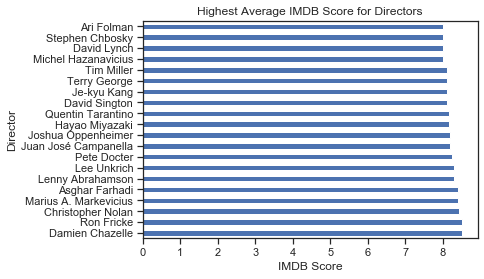

In [120]:
df.groupby('director_name')['imdb_score'].mean().sort_values(ascending = False).head(20).plot(kind = 'barh')

plt.title('Highest Average IMDB Score for Directors')
plt.xlabel('IMDB Score')
plt.ylabel('Director')

In [121]:
df.groupby('director_name')['imdb_score'].mean().sort_values(ascending = False).head(20)


director_name
Damien Chazelle          8.500
Ron Fricke               8.500
Christopher Nolan        8.425
Marius A. Markevicius    8.400
Asghar Farhadi           8.400
Lenny Abrahamson         8.300
Lee Unkrich              8.300
                         ...  
Je-kyu Kang              8.100
Terry George             8.100
Tim Miller               8.100
Michel Hazanavicius      8.000
David Lynch              8.000
Stephen Chbosky          8.000
Ari Folman               8.000
Name: imdb_score, Length: 20, dtype: float64

These are the top directors with the highest average IMDB score for their movies. Damien Chazelle and Ron Fricke have the highest average IMDB score as directors for their movies.

## 4.4 Highest Grossing Movies vs IMDB Scores

In [122]:
px.scatter(df1, x="imdb_score", y="gross", hover_name = 'movie_title', title = 'Highest Grossing Movies vs IMDB Score', color = 'content_rating', size = 'profit')

The size of the graph is based on profitability and it is divided by the rating. When it comes to success based on how much a movie ended up getting in earnings, we cannot really determine how successful or how high of an IMDB score it will get. 

The scatterplot would be difficult to draw a best-fit line through.

## 4.5  IMDB Score vs Movie Facebook Likes

In [123]:
px.scatter(df, x="movie_facebook_likes", y="imdb_score", hover_name = 'movie_title', title = 'IMDB Score vs Movie Facebook Likes', color = 'content_rating')

Divided by the rating, the movies that had higher amounts of facebook likes tended to have a better IMDB score versus those with lower likes typically varied from movie to movie.

## 4.6 Genre and the Average IMDB Score associated with each

In [124]:
avg_genre = genres.groupby('genres')['imdb_score'].mean().reset_index()
avg_genre

,genres,imdb_score
0,Action,6.282688
1,Adventure,6.450460
2,Animation,6.702551
3,Biography,7.140833
4,Comedy,6.178397
5,Crime,6.544699
6,Documentary,6.998182
...,...,...
15,Mystery,6.467021
16,Romance,6.425350


In [125]:
px.bar(avg_genre, x="imdb_score", y="genres", orientation='h',
             title='IMDB Score by Genre')

From the bar chart above, the movie genre with the highest average IMDB score is Film-Noir and the lowest is Horror.

## 4.7 Number of Users for Reviews vs IMDB Score

In [126]:
px.scatter(df, x="movie_facebook_likes", y="num_user_for_reviews",trendline = 'ols', hover_name = 'movie_title', title = 'Number of Users for Review vs Movie Facebook Likes')

In an attempt to see if there was any influence in how many users reviewed the movie based on how popular it was on facebook. There is only a slightly positive trend between the two. The correlation is low enough that it probably didn't matter much though.

## 4.8 Duration vs IMDB Score

In [127]:
df2 = df.sort_values('imdb_score', ascending = False).head(50)

px.scatter(df2, x="imdb_score", y="duration", hover_name='movie_title', color = 'content_rating', title = 'Duration vs IMDB Score', trendline = 'ols')

To see the effect duration has on IMDB score I took the rating of the movie as a filter and applied a trend line to the top 50 movies with the highest IMDB score. 

For the results:
- PG-13 and PG movies that lasted longer tended to have a better IMDB score
- G movies tended to decrease in IMDB score for the longer they lasted.


In [128]:
px.scatter(df, x="imdb_score", y="duration", hover_name='movie_title', title = 'Duration vs IMDB Score', trendline = 'ols')

When using the whole 2000's portion of the dataset, we can notice that the general trend is that longer movies do better with their IMDB scores that shorter movies.

## 4.9 Comparing the top 20 movies to the rest of the movies in terms of IMDB Score

In [129]:
df1 = df
#rearrange the dataframe using sort by descending
toptobottom = df1.sort_values('imdb_score', ascending=-False)
# get top 20
top20 = toptobottom.head(20)
# get the rest
therest = toptobottom.iloc[20:]
# check the number of rows
print( len(toptobottom), len(top20), len(therest) )

2713 20 2693


In [130]:
df_comparison = top20.mean() / therest.mean()
df_comparison = df_comparison.reset_index()
df_comparison = df_comparison.rename(columns = {0:'Mean', 'index': 'Column'})
df_comparison.head()

,Column,Mean
0,num_critic_for_reviews,1.990038
1,duration,1.326549
2,director_facebook_likes,11.532152
3,actor_3_facebook_likes,5.447313
4,actor_1_facebook_likes,1.465941


In [131]:
px.bar(df_comparison, x='Mean', y="Column", orientation='h',
             title='Column Means of the Top 20 Movies Compared to The Rest')

Things to take away from the graph:
- The average profit for the top 20 IMDB scores is 14 times more profitable than the average of the rest of the movies.
- Average of Movie Facebook Likes were around 4 times more than the average of the rest
- Average Director Facebook Likes were around 11 times more than the average of the rest of the movies.
- Average number of users who voted for the movies were 8 times higher than the average number of users who voted for the rest of the movies.
- The average number of users that gave a review for the top 20 IMDB score movies was around 6 times more than the number of users who gave a review for the rest of the films.
- Average number of critics who reviewed for the Top 20 IMDB score movies was 2 times more than the number of critics who reviewed the other movies.

# 5 Correlation Analysis

## 5.1 Setting up the dataset for correlation analysis

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2713 entries, 0 to 5042
Data columns (total 26 columns):
director_name                2713 non-null object
num_critic_for_reviews       2713 non-null float64
duration                     2713 non-null float64
director_facebook_likes      2713 non-null float64
actor_3_facebook_likes       2713 non-null float64
actor_2_name                 2711 non-null object
actor_1_facebook_likes       2713 non-null float64
gross                        2713 non-null float64
genres                       2713 non-null object
actor_1_name                 2712 non-null object
movie_title                  2713 non-null object
num_voted_users              2713 non-null int64
cast_total_facebook_likes    2713 non-null float64
actor_3_name                 2709 non-null object
facenumber_in_poster         2713 non-null float64
plot_keywords                2692 non-null object
movie_imdb_link              2713 non-null object
num_user_for_reviews         2713 no

When it comes to figuring out what predicts IMDB score, there are tons of different names in a variety of columns so:
- Actor Names
- Director Names
- Plot Keywords
- Movie IMDB Link
- Movie Title

Will all be dropped as they are too difficult to distinguish correlation with and to sort out into categories.

In [133]:
df = df.drop(['actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name','movie_imdb_link', 'movie_title', 'plot_keywords'] , axis = 1)
df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit
0,723.0,178.0,961.75,855.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,886204,4834.0,0.0,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000.000000,523505847.0
1,302.0,169.0,563.00,1000.0,40000.0,309404152.0,Action|Adventure|Fantasy,471220,48350.0,0.0,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,16787.517928,9404152.0
2,602.0,148.0,961.75,161.0,11000.0,200074175.0,Action|Adventure|Thriller,275868,11700.0,1.0,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000.000000,-44925825.0
3,813.0,164.0,22000.00,23000.0,27000.0,448130642.0,Action|Thriller,1144337,106759.0,0.0,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000.000000,198130642.0
5,462.0,132.0,475.00,530.0,640.0,73058679.0,Action|Adventure|Sci-Fi,212204,1873.0,1.0,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000.000000,-190641321.0


## 5.2 Setting up the categorical variables for correlation analysis

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2713 entries, 0 to 5042
Data columns (total 19 columns):
num_critic_for_reviews       2713 non-null float64
duration                     2713 non-null float64
director_facebook_likes      2713 non-null float64
actor_3_facebook_likes       2713 non-null float64
actor_1_facebook_likes       2713 non-null float64
gross                        2713 non-null float64
genres                       2713 non-null object
num_voted_users              2713 non-null int64
cast_total_facebook_likes    2713 non-null float64
facenumber_in_poster         2713 non-null float64
num_user_for_reviews         2713 non-null float64
country                      2713 non-null object
content_rating               2713 non-null object
budget                       2713 non-null float64
title_year                   2713 non-null float64
actor_2_facebook_likes       2713 non-null float64
imdb_score                   2713 non-null float64
movie_facebook_likes         27

In [135]:
df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit
0,723.0,178.0,961.75,855.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,886204,4834.0,0.0,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000.000000,523505847.0
1,302.0,169.0,563.00,1000.0,40000.0,309404152.0,Action|Adventure|Fantasy,471220,48350.0,0.0,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,16787.517928,9404152.0
2,602.0,148.0,961.75,161.0,11000.0,200074175.0,Action|Adventure|Thriller,275868,11700.0,1.0,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000.000000,-44925825.0
3,813.0,164.0,22000.00,23000.0,27000.0,448130642.0,Action|Thriller,1144337,106759.0,0.0,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000.000000,198130642.0
5,462.0,132.0,475.00,530.0,640.0,73058679.0,Action|Adventure|Sci-Fi,212204,1873.0,1.0,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000.000000,-190641321.0


In [136]:
genres.head()

,genres,imdb_score
0,Action,7.9
1,Adventure,7.9
2,Fantasy,7.9
3,Sci-Fi,7.9
4,Action,7.1


For our genre dataset, we will be getting dummy variables based on the genres to help see if there's a correlaion between genre and IMDB score.

For our original dataset, we will be getting dummy variables based on content rating and country.

In [137]:
genres = pd.get_dummies(genres, columns = ['genres'])
genres.head()

,imdb_score,genres_Action,genres_Adventure,genres_Animation,genres_Biography,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,...,genres_Horror,genres_Music,genres_Musical,genres_Mystery,genres_Romance,genres_Sci-Fi,genres_Sport,genres_Thriller,genres_War,genres_Western
0,7.9,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.9,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,7.1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
df = pd.get_dummies(df, columns = ['content_rating', 'country'])
df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,...,movie_facebook_likes,profit,content_rating_G,content_rating_NC-17,content_rating_PG,content_rating_PG-13,content_rating_R,country_Other,country_UK,country_USA
0,723.0,178.0,961.75,855.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,886204,4834.0,0.0,...,33000.000000,523505847.0,0,0,0,1,0,0,0,1
1,302.0,169.0,563.00,1000.0,40000.0,309404152.0,Action|Adventure|Fantasy,471220,48350.0,0.0,...,16787.517928,9404152.0,0,0,0,1,0,0,0,1
2,602.0,148.0,961.75,161.0,11000.0,200074175.0,Action|Adventure|Thriller,275868,11700.0,1.0,...,85000.000000,-44925825.0,0,0,0,1,0,0,1,0
3,813.0,164.0,22000.00,23000.0,27000.0,448130642.0,Action|Thriller,1144337,106759.0,0.0,...,164000.000000,198130642.0,0,0,0,1,0,0,0,1
5,462.0,132.0,475.00,530.0,640.0,73058679.0,Action|Adventure|Sci-Fi,212204,1873.0,1.0,...,24000.000000,-190641321.0,0,0,0,1,0,0,0,1


I transformed the categorical variables into numerical amounts to help analyze the categorical columns in terms of IMDB score to see if there's any correlation between the two.

## 5.3 Correlation Analysis

In [139]:
genres.corr()['imdb_score'][:].sort_values(ascending = False).head(10)

imdb_score            1.000000
genres_Drama          0.142554
genres_Biography      0.097472
genres_History        0.075165
genres_War            0.065587
genres_Documentary    0.036634
genres_Animation      0.031664
genres_Crime          0.022041
genres_Western        0.021230
genres_Sport          0.015934
Name: imdb_score, dtype: float64

In [140]:
genres.corr()['imdb_score'][:].sort_values(ascending = False).tail(12)

genres_Musical      0.011106
genres_Mystery      0.002011
genres_Adventure   -0.001387
genres_Romance     -0.008425
genres_Music       -0.010925
genres_Sci-Fi      -0.026317
genres_Thriller    -0.026589
genres_Fantasy     -0.035300
genres_Family      -0.049182
genres_Action      -0.050106
genres_Horror      -0.099953
genres_Comedy      -0.103816
Name: imdb_score, dtype: float64

In [141]:
df.corr()['imdb_score'][:].sort_values(ascending = False).head(10)

imdb_score                 1.000000
num_voted_users            0.470922
num_critic_for_reviews     0.433566
duration                   0.366061
movie_facebook_likes       0.333635
num_user_for_reviews       0.315084
gross                      0.209721
director_facebook_likes    0.198319
content_rating_R           0.160314
country_UK                 0.122947
Name: imdb_score, dtype: float64

In [142]:
df.corr()['imdb_score'][:].sort_values(ascending = False).tail(10)

actor_3_facebook_likes    0.081196
budget                    0.066737
profit                    0.064258
title_year                0.057073
content_rating_NC-17      0.022565
content_rating_G         -0.015090
content_rating_PG        -0.078959
facenumber_in_poster     -0.098489
content_rating_PG-13     -0.104053
country_USA              -0.168677
Name: imdb_score, dtype: float64

Some of the variables strongly correlated to IMDB Scores include:
- Number of Users Voted
- Number of Critical Reviews
- Duration of the Film
- Amount of Facebook Likes on the Movie's page
- Number of Users for Reviews
- Movies were typically rated R and outside of the USA

Some of the variables with absolutely little to no correlation to IMDB scores are:
- The year the movie came out
- Budget of the film
- Content Ratings: NC-17, G, PG
- Genres: Mystery, Musical, Adventure, Romance

## 5.4 Other Variable Correlations To Note

Text(0.5, 1, 'Correlation Analysis')

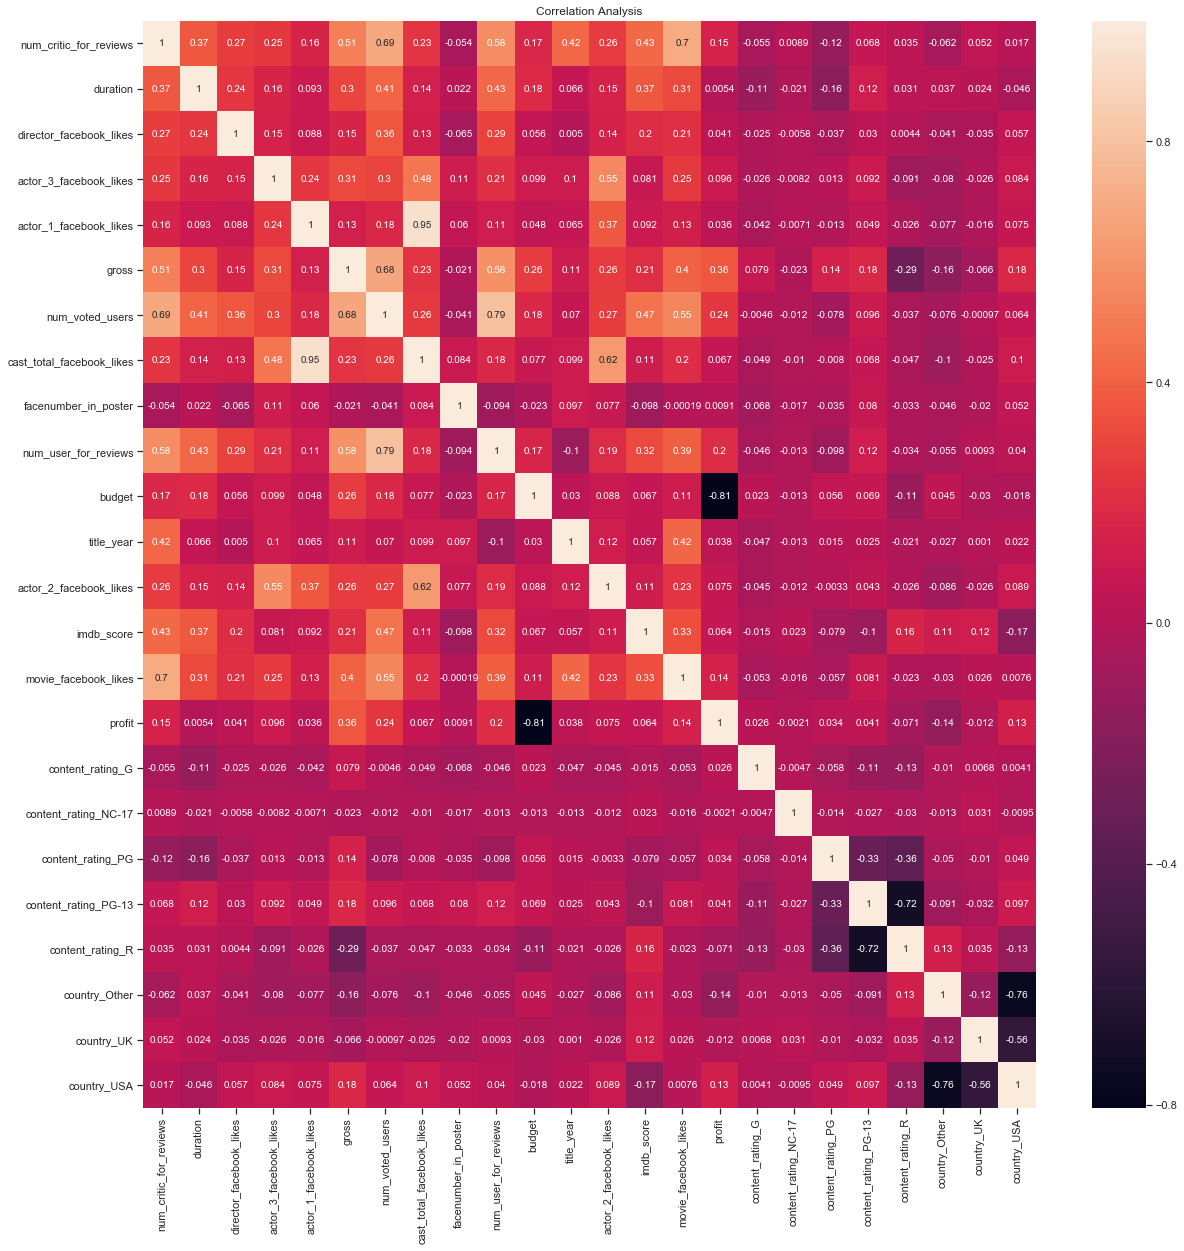

In [143]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Analysis')

Correlations to note:

**Note: The reverse of these statements are also true (ie: If the increase in one variable increases a second variable then it could be said that the increase in the second variable increases the one variable.**

**For Number of Critics for Review:**
- Number of users who voted for the movies has a high positive correlation so as the number of critics who review the movie increase, then the number of users who voted for the movie increases as well.
- As the number of the movie page facebook likes increases, so does the number of critics for review of the film. These two variables have a high positive correlation.

**For Duration of the Movie:**
- While not as high of a positive correlation, as duration of a movie increases so does the:
    1. The number of users who reviewed the movie
    2. The number of critics who reviewed the film
    3. IMDB Score
    4. The number of users who voted for the movie

**For the Number of Likes on Actor's Pages:**
- While the correlation isn't as high, we see that the number of facebook likes for actor 1's page increased as the number of likes on actor 2's facebook page increased.
- In general, each actor increased each others likes on each of their facebook pages.
- This also lead to an increase in the cast total facebook likes, since they are all related to each other.

**For the amount of gross:**
- As the amount of gross increases, so does the:
    1. Number of users who reviewed the movie.
    2. Number of users who voted for the movie
    3. Number of critics who reviewed the movie
    4. Likes on the movie's facebook page
    
**For the number of users who voted on a movie:**
- As the amount of the number of users who voted on a movie increases:
    1. The number of users who reviewed the movie increases
    2. The Facebook page movie likes increases
    3. IMDB Score increases
    4. Number of critics for review increases
    5. The gross of the movie increases
    
There's nothing really correlated with the number of actor in the poster.

As the budget increases, the gross tended to increase as well.

**For the number of users who reviewed a movie:**
- As the amount of the number of users who reviewed a movie increases:
    1. Number of users who voted on movies
    2. Number of critics who reviewed movies
    3. Duration of the movie
    4. Number of Facebook likes on the movie's page
    5. IMDB score
    6. The gross of the movie
    
**For the title year the movie was released:**
- As the title year of the movie increases:
    1. The number of facebook likes a movie got on their page increased
    2. The number of critics who reviewed the movie increased
    
**Characterisitics of Different Content Ratings and Countries:**
- Content Rating of a Movie
    1. G
        - Nothing really significant to distinguish itself. 
        - Positive gross and budget
    2. PG
        - High gross for these movies
    3. PG-13
        - High gross
        - Longer duration
        - High amount of users reviewed
    4. R
        - Low or decreasing gross
    5. NC-17
        - Hard to describe with only one movie
- Countries
    1. USA
        - High gross
        - Less rated R films
        - Less IMDB scores
    2. UK
        - Higher IMDB scores
    3. Others
        - More R movies are made
        - Higher IMDB Scores
        - Lower grossing movies

## 6 Storytelling and Results for Data Analysis

*Correlation descriptions above in section 5*

**IMDB Score**
- Higher Score Factors
    1. Movies outside of the USA
    2. Higher amounts of user who voted on the movie
    3. Higher amounts of critics reviewing the film
    4. Longer movies
    5. Lots of Facebook likes on the movie page
    6. Lots of users that reviewed the movie
    7. Movies that were rated R
    8. Higher gross at the box-office
    9. Profitable
- Lower Score Factors
    1. Being produced in the USA
    2. Being a rating of PG, G, PG-13.
    3. Having a genre of comedy, horror, family, action, fantasy, thriller, science fiction, romance, adventure, and     mystery.
- General Trends
    1. Film-Noir had the highest average IMDB score out of all of the genres.
    2. History and Biography came in second and third respectively.
    3. Damien Chazelle and Ron Fricke had the highest average IMDB score amongst directors.
    4. While not tested, languages, aspect ratio, and color of the movie were some of the more least impactful           variables.
    5. PG and PG-13 movies increased in IMDB score the longer they were, while G rated movies decrease.
    
**Profit**
1. The higher the budget ended up producing more profitable movies to sime suprise
2. The top 20 movies are 14 times more profitable than the rest of the movies in the set.
3. USA had the highest profit
4. The most profitable movie was Avatar and the second most profitable movie was the Avengers
5. In general, the grossing has to be higher than the budget to make a profit
6. The profit was lower when the movie had a lower grossing

**Gross**
- Based on the top 20 most profitable movies, the gross of the movie doesn't seem to really have a relationship with IMDB score.
- The movies within the most profitable also had higher grossings when they were PG-13.
- The only rating that had lower gross to it was movies that were rated R
- Movies made outside of the USA had lower grossings
- The average grossing for the top 20 films in terms of IMDB score was 3 times higher than the rest of the movies average grossing
- Higher Grossing Factors:
    1. Higher amounts of users who voted and reviewed the film
    2. Higher numbers of critics who reviewed the film
    3. Higher amounts of movie Facebook page likes
    4. The higher the budget mostly resulted in a higher grossing
    
**Top 20 IMDB Scored Movies Compared to the Rest**
- Average of Movie Facebook Likes were 4 times more than the average of the rest
- Average Director Facebook Likes were 11 times more than the average of the rest of the movies.
- Average number of users who voted for the movies were 8 times higher the rest of the movies.
- Average number of users that gave a review for the top 20 IMDB score movies was 6 times more than the the rest of the films.
- Average number of critics who reviewed for the Top 20 IMDB score movies was 2 times more than the the other movies.

**General Things Noticed:**
- More rated R and PG-13 movies, that were a part of the top movies, were produced in the 2000's versus other movies like G and PG.
- More movies were produced in the USA than anywhere else
- More R rated movies were produced in the USA.
- Higher amounts of Facebook likes resulted in a higher IMDB score but lower amounts varied from movie to movie

## 7 Data Modeling

### 7.1 Setting up bins for the IMDB Score

In [144]:
df3 = df
pd.cut(df3['imdb_score'], 4)

0       (7.15, 9.0]
1       (5.3, 7.15]
2       (5.3, 7.15]
3       (7.15, 9.0]
5       (5.3, 7.15]
6       (5.3, 7.15]
7       (7.15, 9.0]
           ...     
5021    (5.3, 7.15]
5026    (5.3, 7.15]
5027    (7.15, 9.0]
5033    (5.3, 7.15]
5034    (5.3, 7.15]
5037    (5.3, 7.15]
5042    (5.3, 7.15]
Name: imdb_score, Length: 2713, dtype: category
Categories (4, interval[float64]): [(1.593, 3.45] < (3.45, 5.3] < (5.3, 7.15] < (7.15, 9.0]]

In [145]:
df3['imdb_bins'] = pd.cut(df3['imdb_score'], 4, labels = ['1','2','3','4'])
df3.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,...,profit,content_rating_G,content_rating_NC-17,content_rating_PG,content_rating_PG-13,content_rating_R,country_Other,country_UK,country_USA,imdb_bins
0,723.0,178.0,961.75,855.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,886204,4834.0,0.0,...,523505847.0,0,0,0,1,0,0,0,1,4
1,302.0,169.0,563.00,1000.0,40000.0,309404152.0,Action|Adventure|Fantasy,471220,48350.0,0.0,...,9404152.0,0,0,0,1,0,0,0,1,3
2,602.0,148.0,961.75,161.0,11000.0,200074175.0,Action|Adventure|Thriller,275868,11700.0,1.0,...,-44925825.0,0,0,0,1,0,0,1,0,3
3,813.0,164.0,22000.00,23000.0,27000.0,448130642.0,Action|Thriller,1144337,106759.0,0.0,...,198130642.0,0,0,0,1,0,0,0,1,4
5,462.0,132.0,475.00,530.0,640.0,73058679.0,Action|Adventure|Sci-Fi,212204,1873.0,1.0,...,-190641321.0,0,0,0,1,0,0,0,1,3


These bins help us when we are trying to build models later on that try to predict the range that a movie's IMDB score will fall into when we use models besides regresssions.

### 7.2 Determining important features

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2713 entries, 0 to 5042
Data columns (total 26 columns):
num_critic_for_reviews       2713 non-null float64
duration                     2713 non-null float64
director_facebook_likes      2713 non-null float64
actor_3_facebook_likes       2713 non-null float64
actor_1_facebook_likes       2713 non-null float64
gross                        2713 non-null float64
genres                       2713 non-null object
num_voted_users              2713 non-null int64
cast_total_facebook_likes    2713 non-null float64
facenumber_in_poster         2713 non-null float64
num_user_for_reviews         2713 non-null float64
budget                       2713 non-null float64
title_year                   2713 non-null float64
actor_2_facebook_likes       2713 non-null float64
imdb_score                   2713 non-null float64
movie_facebook_likes         2713 non-null float64
profit                       2713 non-null float64
content_rating_G             

In [147]:
y = df['imdb_score'] 
X = df.drop(['imdb_score', 'genres', 'imdb_bins'],axis = 1)

In [148]:
X_new = SelectKBest(f_regression, k=4).fit_transform(X, y)
X_new

array([[7.23000000e+02, 1.78000000e+02, 8.86204000e+05, 3.30000000e+04],
       [3.02000000e+02, 1.69000000e+02, 4.71220000e+05, 1.67875179e+04],
       [6.02000000e+02, 1.48000000e+02, 2.75868000e+05, 8.50000000e+04],
       ...,
       [3.50000000e+01, 8.00000000e+01, 5.89000000e+02, 7.40000000e+01],
       [1.40000000e+01, 9.50000000e+01, 1.33800000e+03, 4.13000000e+02],
       [4.30000000e+01, 9.00000000e+01, 4.28500000e+03, 4.56000000e+02]])

In [149]:
selector = SelectKBest(f_regression, k=5).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[ 0  1  6  9 13]


In [150]:
X.head().iloc[:,0:14]

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,movie_facebook_likes
0,723.0,178.0,961.75,855.0,1000.0,760505847.0,886204,4834.0,0.0,3054.0,237000000.0,2009.0,936.0,33000.000000
1,302.0,169.0,563.00,1000.0,40000.0,309404152.0,471220,48350.0,0.0,1238.0,300000000.0,2007.0,5000.0,16787.517928
2,602.0,148.0,961.75,161.0,11000.0,200074175.0,275868,11700.0,1.0,994.0,245000000.0,2015.0,393.0,85000.000000
3,813.0,164.0,22000.00,23000.0,27000.0,448130642.0,1144337,106759.0,0.0,2701.0,250000000.0,2012.0,23000.0,164000.000000
5,462.0,132.0,475.00,530.0,640.0,73058679.0,212204,1873.0,1.0,738.0,263700000.0,2012.0,632.0,24000.000000


From the f_Regression just performed, we have determined that the model believes that **the number of critics for reviews, duration of the movie, the number of voted users, the number of users for reviews, and the number of movie facebook likes as well are the best predictors.**

In [151]:
runs_reg_model = ols("imdb_score~num_critic_for_reviews+duration+num_voted_users+num_user_for_reviews+movie_facebook_likes",df)
runs_reg = runs_reg_model.fit()
print(runs_reg.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     223.7
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          2.85e-200
Time:                        13:26:42   Log-Likelihood:                -3503.1
No. Observations:                2713   AIC:                             7018.
Df Residuals:                    2707   BIC:                             7054.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

Based on the f_Regression, our model has mostly significant variables except for the number of movie facebook likes. Our r-squared and adjusted r-squared is also relatively low. This model doesn't appear to be very useful for predicting IMDB score.

In [152]:
runs_reg_model = ols("imdb_score~num_critic_for_reviews+duration+num_voted_users+num_user_for_reviews",df)
runs_reg = runs_reg_model.fit()
print(runs_reg.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     279.3
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          3.11e-201
Time:                        13:26:42   Log-Likelihood:                -3503.7
No. Observations:                2713   AIC:                             7017.
Df Residuals:                    2708   BIC:                             7047.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

Based on this 2nd model attempted, I figured that removing the number of movie facebook likes as a predictor would change things. This was not the case thus from these two models it is very unlikely any type of regression would be useful. This is due to the high amount of multicollinearity between the different predictors.

**Note: Both of these models have an incredibly high condition number. This leads to my conclusion of multicollinearity in the two created and the reason why they aren't very helpful in terms of predicting the model.**

### 7.4 Building Classification Models

In [153]:
 np.random.seed(1)

#### Decision Tree

In [154]:
y = df3['imdb_bins']
X = df3.drop(['imdb_score', 'genres','imdb_bins'], axis = 1)

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

dt = DecisionTreeClassifier(max_features = 8, max_leaf_nodes = 15)

dt = dt.fit(X_train, y_train)

dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=8, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [156]:
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))

0.6584766584766585
--------------------------------------------------------
[[  0   0   9   0]
 [  0   0  99   4]
 [  0   0 449  52]
 [  0   0 114  87]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00       103
           3       0.67      0.90      0.77       501
           4       0.61      0.43      0.51       201

    accuracy                           0.66       814
   macro avg       0.32      0.33      0.32       814
weighted avg       0.56      0.66      0.60       814



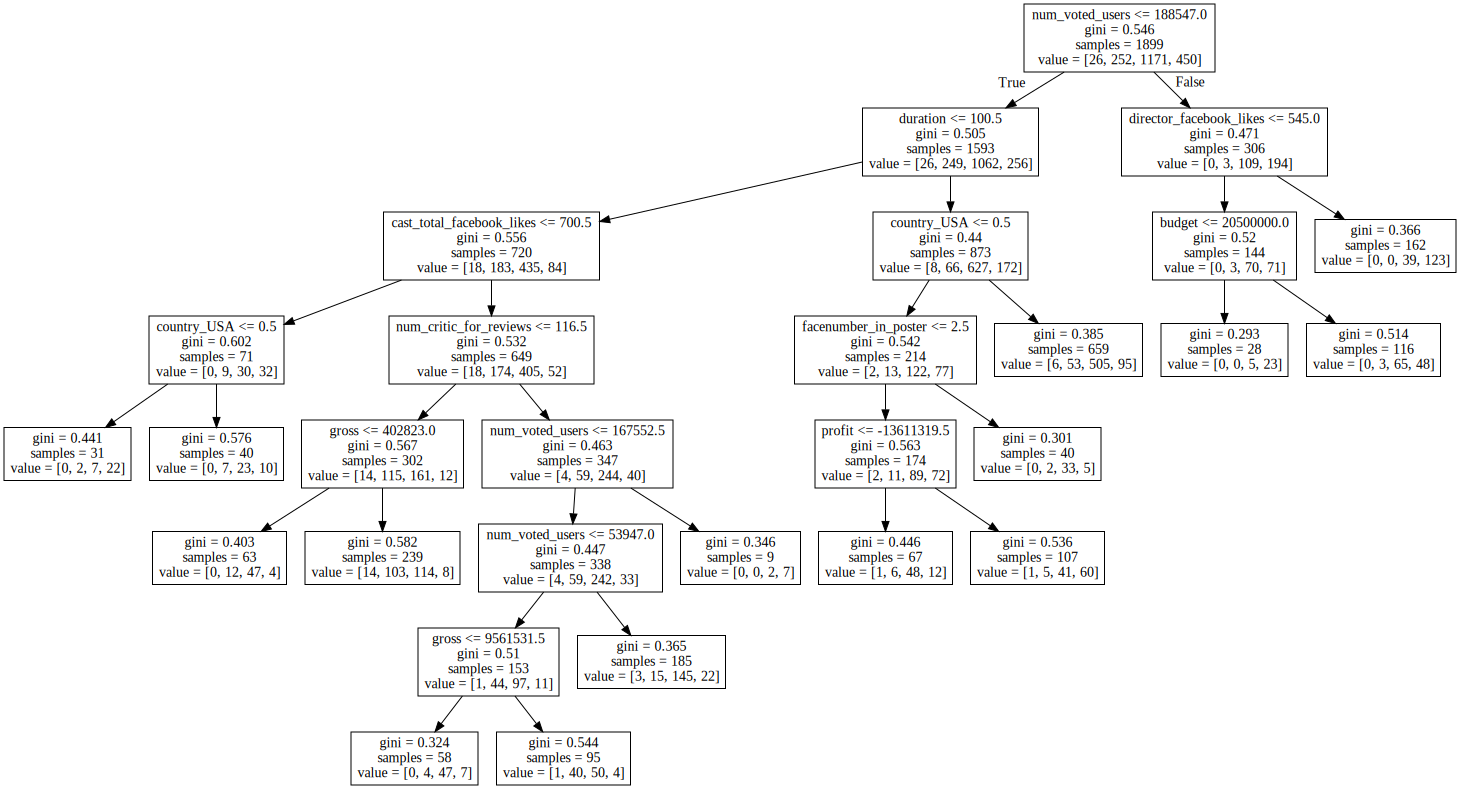

In [157]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(dt, out_file=None, feature_names=X.columns))

For this model, the accuracy is at a 66% overall when it comes to predicting the movie's IMDB score correctly. 

This model had 278 movies misclassified into other IMDB scores. The first two bins of movies didn't have any predicted correctly.

#### Random Tree Forest Classifier

In [161]:
clf = RandomForestClassifier(n_estimators=20, max_features = 9, random_state = 40)    #building 20 decision trees
clf = clf.fit(X_train, y_train)

In [162]:
print(metrics.accuracy_score(y_test, clf.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, clf.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, clf.predict(X_test)))

0.7051597051597052
--------------------------------------------------------
[[  0   4   5   0]
 [  0  31  72   0]
 [  0  22 444  35]
 [  0   0 102  99]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.54      0.30      0.39       103
           3       0.71      0.89      0.79       501
           4       0.74      0.49      0.59       201

    accuracy                           0.71       814
   macro avg       0.50      0.42      0.44       814
weighted avg       0.69      0.71      0.68       814



This model has the highest accuracy of around 71%.

240 movies were inaccurately predicted.

In [ ]:
knn = KNeighborsClassifier()

knn = knn.fit(X_train, y_train)

In [ ]:
print(metrics.accuracy_score(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, knn.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")

This model had a 57% accuracy when predicting IMDB score.

346 movies were inaccurately predicted.

In [ ]:
pd.DataFrame(clf.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

The top 5 most important features are
1. the number of users who voted
2. the duration
3. the number of users for reviews
4. the gross of the movie
5. the cast total facebook likes.

**The best of the three models has to be the RandomTreeClassifier.**

### 7.5 Clustering

In [ ]:
k_means = KMeans(init='k-means++', n_clusters=3, random_state=0)
k_means.fit(X)

In [ ]:
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

In [ ]:
df = df.reset_index(drop=True)
df1 = df1.reset_index(drop=True)

df2 = df.join(df1)
df2.head()

In [ ]:
df2.groupby('cluster').mean()

In [ ]:
df2.groupby('cluster')['imdb_score'].mean()

In [ ]:
df2.groupby('cluster').size()

When looking at the clusters formed:

1. Seems to contain mostly US movies and it seems to contain a higher variety of movies. It contains the highest overall grossing and profit and one of the higher IMDB scores
2. Contains the movies that didn't do as hot and had the lowest IMDB scores
3. This had the highest IMDB score but the lowest of all the other categories. The suprising part is that these movies were all from other countries.

In [ ]:
agg= AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)
agg.labels_

In [ ]:
df1 = pd.DataFrame(agg.labels_, columns = ['cluster'])
df1.head()

In [ ]:
df2 = df.join(df1)
df2.head()

In [ ]:
df2.groupby('cluster').mean()

In [ ]:
df2.groupby('cluster')['imdb_score'].mean()

In [ ]:
df2.groupby('cluster').size()

When looking at the clusters formed:

1. Seems to contain mostly US movies and it seems to contain a higher variety of movies. It contains the highest overall grossing and profit and one of the higher IMDB scores. It appears to contain the upper tier of movies within this cluster.
2. Low number of movies within this one. There are only 3. Highest IMDB score and all from other countries. Lower on everything else though
3. This had the lowest  IMDB score but the lowest of all the other categories. This appears to be the lower tier of movies in terms of IMDB score. They have the lowest. However, it has the most movies located within this cluster and the lowest in all other columns.

**The clustering doesn't seem to be a good fit for our model due to the unevenness between the clusters and how many observations are within them.**

## 8 Model Storytelling

**All of the models have detailed descriptions of what information they contain right underneath it. This section will be used more towards which model is best for predicting IMDB scores of movies**

From all the models created, the best one I believe that could be used to have some usefulness is the **RandomTreeClassifier model.** 

This model had one of the highest accuracies among the models and had some very good intel when it came to predicting which bin the IMDB score fell in for a certain movie.

The other models either had:
1. Low accuracy and a high amount of incorrect predictions based on the confusion matrix
2. A high amount of multicollinearity within the model
3. Poorly formed clusters that didn't have a similar number of observations.

However, this other model contained:
1. 71% accuracy rating
2. Only 240 movies were inaccurately predicted within the dataset.

This makes the RandomForestRegressor the best model to implement into the real world. 

**In terms of recommendations on which variable to use and recommendations on what to say to the movie community.**

For the variables:
1. the number of users who voted for the movie
2. the duration of the movie
3. the number of users for reviews
4. the grossing amount of the movie
5. the cast total facebook likes

These are the most important features when it came to predicting a movie's IMDB score.

In terms of which variables to add for better model improvement:
1. What the critics gave the movie on a scale of 1 - 10
2. The percentage of budget spent on certain categories like actor and actresses
3. Percentage of users by country on who voted for or against the movie

The reason for these would be to see if:
1. To determine how much of an impact the critics ratings had on the IMDB score
2. To see if there's something between how much is spent on good actors and actresses and IMDB score
3. I'm curious if only users from the movie's original country voted for their own country's movie and if that had an impact on the IMDB score

The recommendations I would make to the cinema community is to:
1. Try to encourage more voters and users for reviews in general by incentivizing them with a trip if they vote on the website
2. Make a relatively long movie that won't go too crazy long like over 3 hours to have a chance at increasing your IMDB score 
3. For investors, a higher IMDB score doesn't always mean higher profit so beware.
4. Social media is a good friend as more people who vote on the cast facebook likes are important when it comes to IMDB score so push social media.
5. Always make sure to try and make a profit, however the grossing of a movie usually tends to draw a higher IMDB score as well.